# Introduction to ZenML  
In this notebook, we will have an introduction with ZenML.  

### What is ZenML  
ZenML is an open source MLOps framework. It is an orchestration tool for streamlined production pipelines. It provides interfaces and abstractions that allow developers to plugin their tools for various workflows. If an existing tool does not fit the need, a new one be written that follows the interface eg MLFlow integration for experiment tracking. It is very simple to create pipelines in ZenML. It can also do model and artifact versioning, along with automated deployments to multiple cloud providers.  


### Install ZenML

Create python virtual environment and activate it. Run below commands in your shell from root directory of this notebook.  

In [ ]:
# Install jypyter globally
pip install jupyterlab
# creates a virtual environment  
python3 -m venv venv
# updates your path environment variable to point to new venv for python and pip  
source venv/bin/activate
# installs ipykernel in your venv  
pip install ipykernel
# (optional) list jupyter kernels  
jupyter kernelspec list
# this creates venv virtual environment to be used in notebook
python3 -m ipykernel install --user --name=venv
# launch jupyter notebook from venv activated shell 
jupyter lab 
# uninstall unwanted kernels, at the end of exercise you can remove zenml-intro kernel 
#jupyter kernelspec uninstall venv

Install ZenML

In [7]:
!pip install zenml

Install Zenml dashboard

In [15]:
!pip install zenml["server"]

Note: you may need to restart the kernel to use updated packages.


Verify that Zenml is installed properly

In [4]:
!zenml version

      
       .-') _   ('-.       .-') _  _   .-')              
      (  OO) )_(  OO)     ( OO ) )( '.( OO )_            
    ,(_)----.(,------.,--./ ,--,'  ,--.   ,--.),--.      
    |       | |  .---'|   \ |  |\  |   `.'   | |  |.-')  
    '--.   /  |  |    |    \|  | ) |         | |  | OO ) 
    (_/   /  (|  '--. |  .     |/  |  |'.'|  | |  |`-' | 
     /   /___ |  .--' |  |\    |   |  |   |  |(|  '---.' 
    |        ||  `---.|  | \   |   |  |   |  | |      |  
    `--------'`------'`--'  `--'   `--'   `--' `------' 
    
version: 0.57.1


### ZenML Concepts  
__Pipeline__  
A pipeline is a collection of steps. A step is a task/function in python. Pipeline is not ML specific concept, it is a collection of tasks  
that are tracked by zeml for logging and monitoring purposes. By default, steps are executed in the order they are written in a pipeline. Steps can  
also be ordered by priority and with a dependency order for complex pipeline modelling.  
__Artifact__  
This is input and output from steps. These are also tracked and versioned by Zenml. By default artifacts are stored in local machine directory,  
but it can also be remote cloud location eg S3.  
__Components__
This is the configuration for functions in zenml.  
__Stack__  
It is a collection of Components and Infrastructure. By default stack has Orchestrator and Artifact Store.  
__Flavors__
Solutions created by integrating other MLOps tools with Zenml, by extending the base abstractions.  
__Materializers__
These define how input and output are passed between steps via artifact store. The Base materializer abstraction can be extended to create custom materializer.  
__ZenML Server__
Used for deploying ML Models and making predictions.  


### ZenML Commands  
Some frequently used commands. Try them now in your bash shell.    
* Initialize zenml repository `zenml init`  
* Run zenml dashboard locally `zenml up`  
* Show status of pipelines `zenml show`  
* Get details on current active stack configuration `zenml stack describe`  
* Gets all stacks `zenml stack list`  


In [24]:
#import necessary modules to create step and pipeline
from zenml import pipeline, step

#Define the step and returns a string. 
@step
def say_hello()->str:
    return "Hello"

#Take 2 inputs and print the output
@step
def combine(input_1:str,input_2:str)->None:
    print(input_1,input_2)

#define a pipeline 
@pipeline
def my_greeting_pipeline():
    greeting=say_hello() 
    combine(greeting,"Prashant")

#execute the pipeline
my_greeting_pipeline()

Initiating a new run for the pipeline: my_greeting_pipeline.
Registered new version: (version 1).
Executing a new run.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
Dashboard URL: http://127.0.0.1:8237/runs/0b0784b2-8cb3-49c1-8853-5690b140b774
Step say_hello has started.
Step say_hello has finished in 0.209s.
Step combine has started.
Hello Prashant
Step combine has finished in 0.534s.
Pipeline run has finished in 1.081s.


PipelineRunResponse(body=PipelineRunResponseBody(created=datetime.datetime(2024, 5, 16, 16, 3, 33, 216220), updated=datetime.datetime(2024, 5, 16, 16, 3, 34, 432395), user=UserResponse(body=UserResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 657536), updated=datetime.datetime(2024, 5, 16, 15, 47, 22, 384004), active=True, activation_token=None, full_name='Prashant Jain', email_opted_in=False, is_service_account=False, is_admin=True), metadata=None, resources=None, id=UUID('5124a104-d177-4b24-9a10-fd50ed3a85b6'), permission_denied=False, name='default'), status=<ExecutionStatus.COMPLETED: 'completed'>, stack=StackResponse(body=StackResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 306851), updated=datetime.datetime(2024, 4, 30, 22, 54, 51, 306860), user=None), metadata=None, resources=None, id=UUID('87189a3a-54dc-4072-bfb7-21ee1a4b3c19'), permission_denied=False, name='default'), pipeline=PipelineResponse(body=PipelineResponseBody(created=datetime.datetime(

Check the pipeline excution in dashboard  
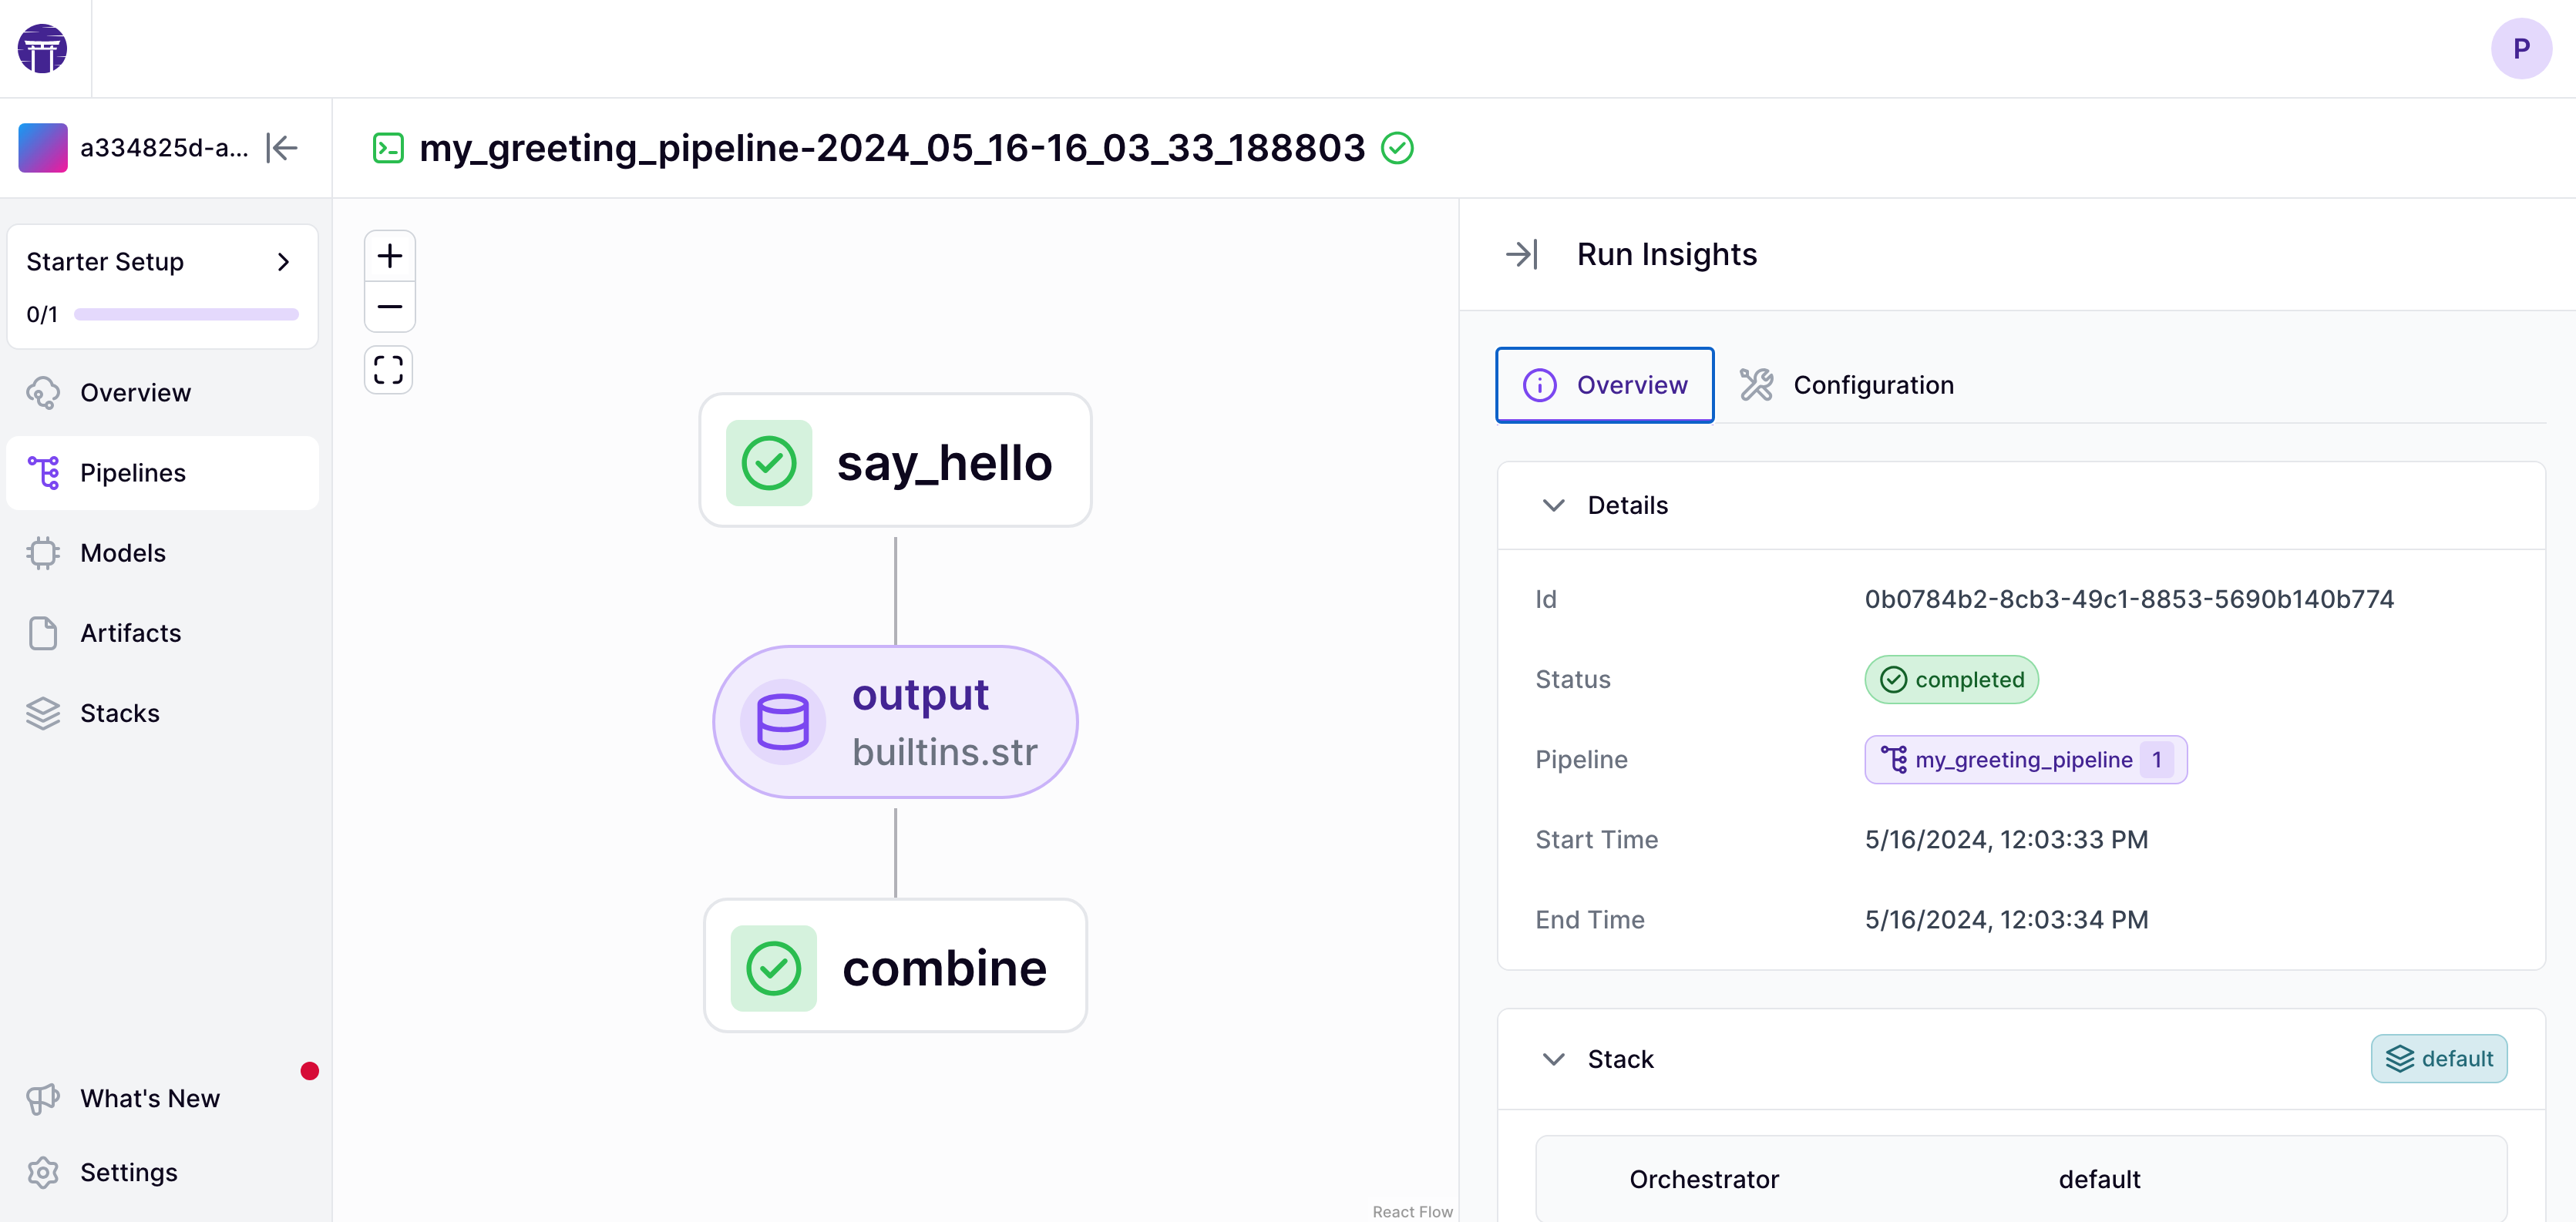

By default the pipeline name is same as the method that is decorated with @pipeline. We can also rename the pipeline name

In [26]:
my_greeting_pipeline = my_greeting_pipeline.with_options(
    run_name = 'Greet Prashant'
)
my_greeting_pipeline()

Initiating a new run for the pipeline: my_greeting_pipeline.
Reusing registered pipeline version: (version: 1).
Executing a new run.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
Dashboard URL: http://127.0.0.1:8237/runs/fd69e1d8-ccc9-41ac-a988-a08709c55545
Using cached version of say_hello.
Step say_hello has started.
Using cached version of combine.
Step combine has started.
Pipeline run has finished in 0.920s.


PipelineRunResponse(body=PipelineRunResponseBody(created=datetime.datetime(2024, 5, 16, 16, 15, 43, 92181), updated=datetime.datetime(2024, 5, 16, 16, 15, 44, 114467), user=UserResponse(body=UserResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 657536), updated=datetime.datetime(2024, 5, 16, 15, 47, 22, 384004), active=True, activation_token=None, full_name='Prashant Jain', email_opted_in=False, is_service_account=False, is_admin=True), metadata=None, resources=None, id=UUID('5124a104-d177-4b24-9a10-fd50ed3a85b6'), permission_denied=False, name='default'), status=<ExecutionStatus.COMPLETED: 'completed'>, stack=StackResponse(body=StackResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 306851), updated=datetime.datetime(2024, 4, 30, 22, 54, 51, 306860), user=None), metadata=None, resources=None, id=UUID('87189a3a-54dc-4072-bfb7-21ee1a4b3c19'), permission_denied=False, name='default'), pipeline=PipelineResponse(body=PipelineResponseBody(created=datetime.datetime

  
The greeting pipeline had two runs so far, and the new name is reflected in Zenml Dashboard  
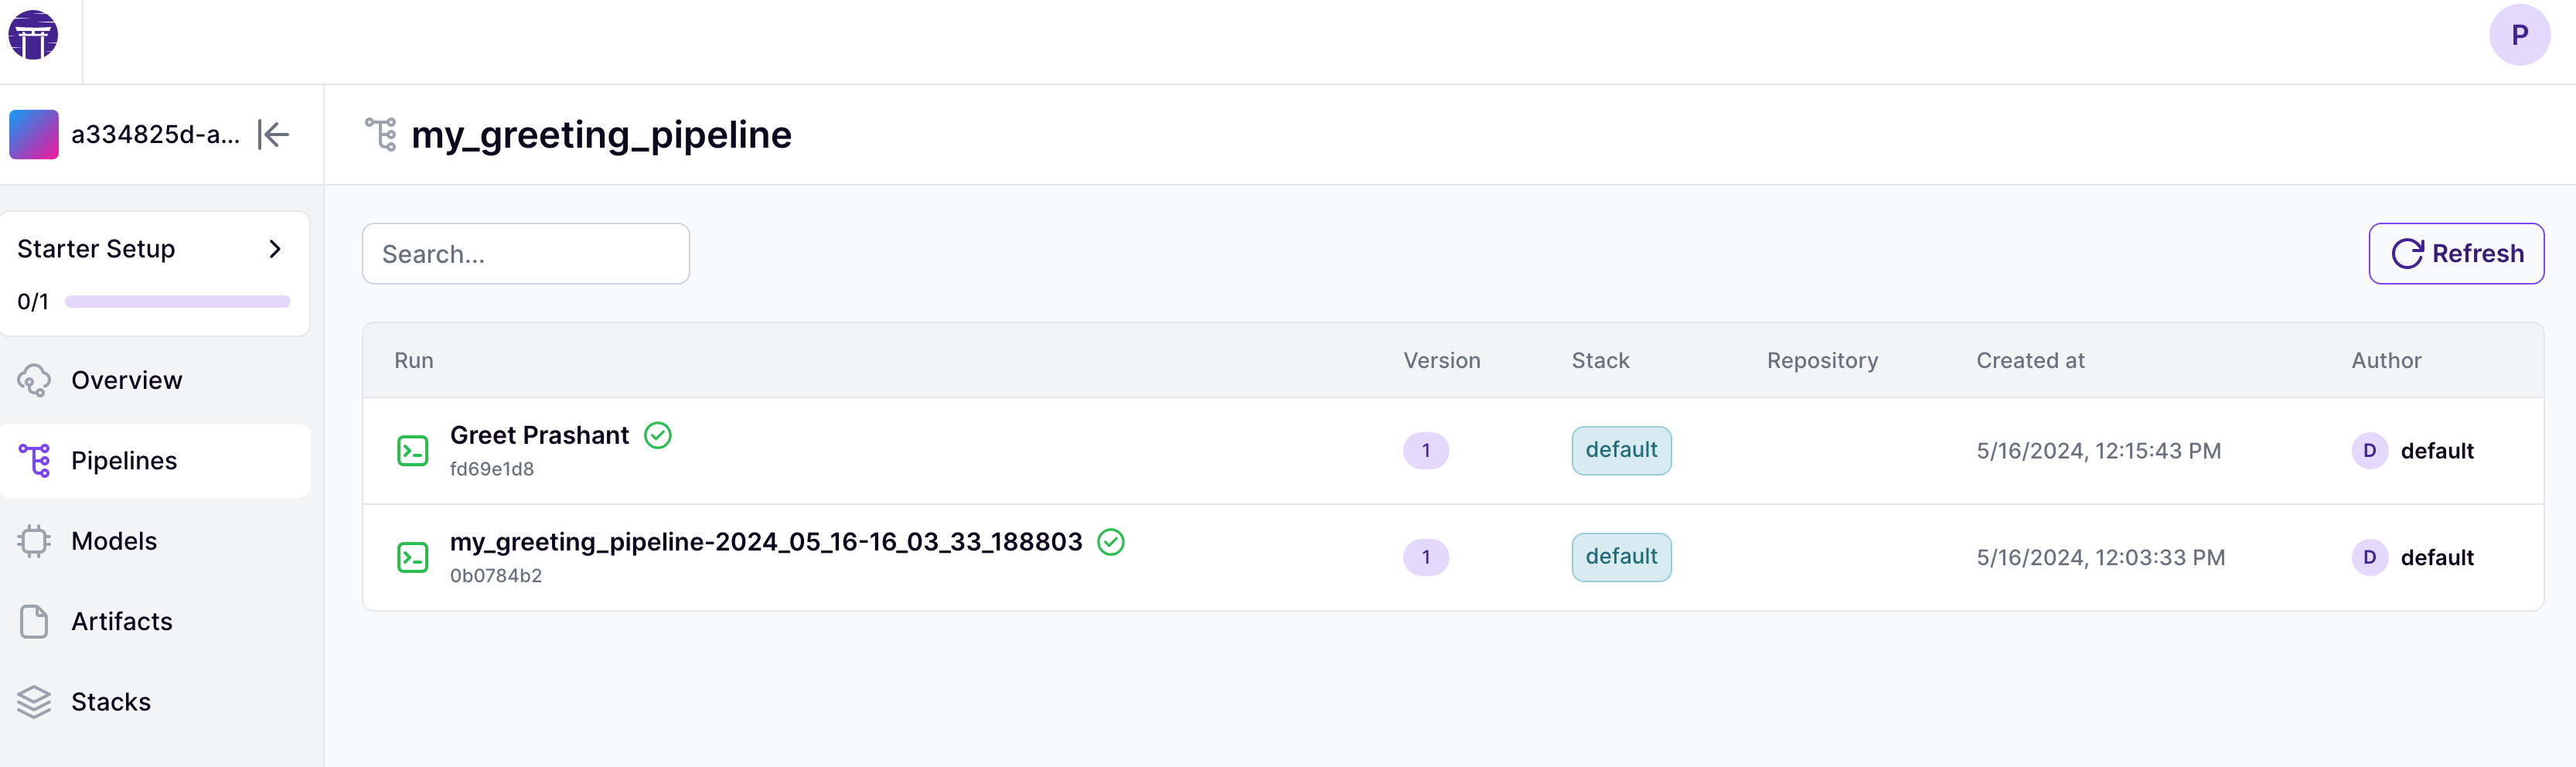

We can also add date and time to Pipeline run title  

In [29]:
my_greeting_pipeline = my_greeting_pipeline.with_options(
run_name="Greet_Prashant_{date}_{time}" )
my_greeting_pipeline()

Initiating a new run for the pipeline: my_greeting_pipeline.
Reusing registered pipeline version: (version: 1).
Executing a new run.
Using user: default
Using stack: default
  orchestrator: default
  artifact_store: default
Dashboard URL: http://127.0.0.1:8237/runs/0a578150-86a5-4dbe-b114-ad7580ad2725
Using cached version of say_hello.
Step say_hello has started.
Using cached version of combine.
Step combine has started.
Pipeline run has finished in 0.802s.


PipelineRunResponse(body=PipelineRunResponseBody(created=datetime.datetime(2024, 5, 16, 16, 23, 12, 938388), updated=datetime.datetime(2024, 5, 16, 16, 23, 13, 909316), user=UserResponse(body=UserResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 657536), updated=datetime.datetime(2024, 5, 16, 15, 47, 22, 384004), active=True, activation_token=None, full_name='Prashant Jain', email_opted_in=False, is_service_account=False, is_admin=True), metadata=None, resources=None, id=UUID('5124a104-d177-4b24-9a10-fd50ed3a85b6'), permission_denied=False, name='default'), status=<ExecutionStatus.COMPLETED: 'completed'>, stack=StackResponse(body=StackResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 306851), updated=datetime.datetime(2024, 4, 30, 22, 54, 51, 306860), user=None), metadata=None, resources=None, id=UUID('87189a3a-54dc-4072-bfb7-21ee1a4b3c19'), permission_denied=False, name='default'), pipeline=PipelineResponse(body=PipelineResponseBody(created=datetime.datetim

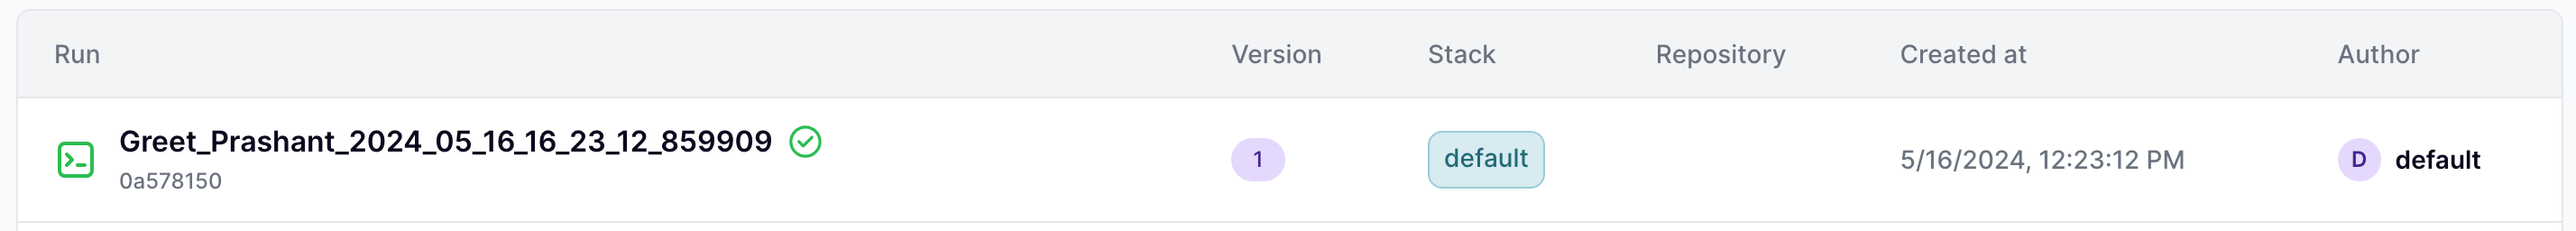

We can also get model name and last pipeline run like below

In [32]:
model=my_greeting_pipeline.model 
print(model.name)
# Now we can access the last run of the pipeline
run = model.last_run 
print("last run is:", run)

my_greeting_pipeline
last run is: body=PipelineRunResponseBody(created=datetime.datetime(2024, 5, 16, 16, 23, 12, 938388), updated=datetime.datetime(2024, 5, 16, 16, 23, 13, 909316), user=UserResponse(body=UserResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 657536), updated=datetime.datetime(2024, 5, 16, 15, 47, 22, 384004), active=True, activation_token=None, full_name='Prashant Jain', email_opted_in=False, is_service_account=False, is_admin=True), metadata=None, resources=None, id=UUID('5124a104-d177-4b24-9a10-fd50ed3a85b6'), permission_denied=False, name='default'), status=<ExecutionStatus.COMPLETED: 'completed'>, stack=StackResponse(body=StackResponseBody(created=datetime.datetime(2024, 4, 30, 22, 54, 51, 306851), updated=datetime.datetime(2024, 4, 30, 22, 54, 51, 306860), user=None), metadata=None, resources=None, id=UUID('87189a3a-54dc-4072-bfb7-21ee1a4b3c19'), permission_denied=False, name='default'), pipeline=PipelineResponse(body=PipelineResponseBody(created=da